# Comparison between Nestorov and normal momentum approaches 

## Import libreries and define global variables

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from NeuralNetwork import NeuralNetwork
from utils import get_data, onehot_encoding, grid_search, save_dict_to_file, load_dict_from_file
from Layer import Layer, Input
from functions import accuracy, MSE, MEE
import pandas as pd

In [3]:
DIR = '/Users/HP/Desktop/UNI/LM_1/MachineLearning/ML_prj/' # Directory of the package.

## Import datasets

### Import MONK datasets

In [4]:
df = get_data(f'{DIR}data/MONK/monks-1.train')
df_test = get_data(f'{DIR}data/MONK/monks-1.test')

X_train_monk, y_train_monk = df.drop(columns=['target','id']).to_numpy().T, df['target'].apply(lambda x: int(x)).to_numpy().T
X_test_monk, y_test_monk = df_test.drop(columns=['target','id']).to_numpy().T, df_test['target'].apply(lambda x: int(x)).to_numpy().T

### Import CUP dataset

Define the fraction of dataset which will represent the internal test set.

In [5]:
test_frac = 1/4

In [6]:
names = ['id', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 
         'feature_7', 'feature_8', 'feature_9', 'feature_10', 'target_x', 'target_y','target_z']

df = pd.read_csv(f"{DIR}data/ML-CUP23-TR.csv", names=names, comment='#')

targets = ['target_x', 'target_y', 'target_z']
features = list(set(names) - {'id', 'target_x', 'target_y', 'target_z'})

df = df.sample(frac=1)

train_test_div = round((1-test_frac) * df.shape[0])

X_train_cup, y_train_cup = df[:train_test_div][features].to_numpy().T, df[:train_test_div][targets].to_numpy().T
X_test_cup, y_test_cup = df[train_test_div:][features].to_numpy().T, df[train_test_div:][targets].to_numpy().T

## Data preprocessing

### MONK preprocessing

Process one hot encoding on training and test sets.

In [7]:
X_train_monk = onehot_encoding(X_train_monk)
X_test_monk = onehot_encoding(X_test_monk)

### CUP preprocessing

Decide which data preprocessing method apply to cup training set:
+ MinMax normalization (preprocessing = 1)
+ Standardization (preprocessing = 2)

In [8]:
preprocessing = 0

In [9]:
if preprocessing == 1:
    X_train_cup = minmax_norm(X_train_cup)
    X_test_cup = minmax_norm(X_test_cup)
elif preprocessing == 2:
    X_train_cup = standard(X_train_cup)
    X_test_cup = standard(X_test_cup)

## MONK

Define training and model hyperparameters

In [10]:
orig_params = {'hidden_dim': 4,
        'hidden_act_func': 'tanh',
        'eta': 0.5,
        'lam': 0.0,
        'alpha': 0.9,
        'n_batch': 99,
        'use_opt':0,
        'nest': False,
        'l1_reg' : False,
        'epochs' : 500
        }

seed = np.random.randint(10,10000)

### Normal momentum

Build model

In [11]:
params = orig_params.copy()
input_layer = Input(17)
hidden_layer = Layer(input_layer, params.pop('hidden_dim'), params.pop('hidden_act_func'), init_weights_mode='rand')
output_layer = Layer(hidden_layer, 1, 'sigm', init_weights_mode='rand')

model = NeuralNetwork(input_layer, output_layer, loss = 'binary_crossentropy', metrics = [accuracy, MSE])

init_weights_list = model.get_initial_weights_list()

Training with normal momentum:

In [12]:
np.random.seed(seed)
params['nest'] = False
history_nonest = model.train(X_train_monk, y_train_monk.reshape((1,X_train_monk.shape[1])),
                                    validation_split = 0.2,
                                    early_stopping=None,
                                    reduce_eta=None,
                                    **params
                                    )

Epoch 0: train_loss: 6.964e-01, val_loss: 7.112e-01; train_accuracy: 4.848e+01, val_accuracy: 5.200e+01  train_MSE: 2.517e-01, val_MSE: 2.589e-01  lr : 0.5
Epoch 1: train_loss: 6.779e-01, val_loss: 7.347e-01; train_accuracy: 5.758e+01, val_accuracy: 3.600e+01  train_MSE: 2.425e-01, val_MSE: 2.703e-01  lr : 0.5
Epoch 2: train_loss: 6.601e-01, val_loss: 7.551e-01; train_accuracy: 6.364e+01, val_accuracy: 4.000e+01  train_MSE: 2.338e-01, val_MSE: 2.803e-01  lr : 0.5
Epoch 3: train_loss: 6.396e-01, val_loss: 7.534e-01; train_accuracy: 6.667e+01, val_accuracy: 4.000e+01  train_MSE: 2.239e-01, val_MSE: 2.794e-01  lr : 0.5
Epoch 4: train_loss: 6.102e-01, val_loss: 7.131e-01; train_accuracy: 6.970e+01, val_accuracy: 5.200e+01  train_MSE: 2.096e-01, val_MSE: 2.599e-01  lr : 0.5
Epoch 5: train_loss: 5.775e-01, val_loss: 6.402e-01; train_accuracy: 7.374e+01, val_accuracy: 6.400e+01  train_MSE: 1.939e-01, val_MSE: 2.246e-01  lr : 0.5
Epoch 6: train_loss: 5.564e-01, val_loss: 5.694e-01; train_accur

Epoch 54: train_loss: 1.235e-01, val_loss: 1.788e-01; train_accuracy: 9.596e+01, val_accuracy: 9.600e+01  train_MSE: 3.049e-02, val_MSE: 4.996e-02  lr : 0.5
Epoch 55: train_loss: 1.177e-01, val_loss: 1.754e-01; train_accuracy: 9.596e+01, val_accuracy: 9.600e+01  train_MSE: 2.851e-02, val_MSE: 4.860e-02  lr : 0.5
Epoch 56: train_loss: 1.122e-01, val_loss: 1.712e-01; train_accuracy: 9.596e+01, val_accuracy: 9.600e+01  train_MSE: 2.664e-02, val_MSE: 4.689e-02  lr : 0.5
Epoch 57: train_loss: 1.071e-01, val_loss: 1.667e-01; train_accuracy: 9.596e+01, val_accuracy: 9.600e+01  train_MSE: 2.489e-02, val_MSE: 4.500e-02  lr : 0.5
Epoch 58: train_loss: 1.023e-01, val_loss: 1.621e-01; train_accuracy: 9.697e+01, val_accuracy: 9.600e+01  train_MSE: 2.325e-02, val_MSE: 4.307e-02  lr : 0.5
Epoch 59: train_loss: 9.779e-02, val_loss: 1.574e-01; train_accuracy: 9.798e+01, val_accuracy: 9.600e+01  train_MSE: 2.174e-02, val_MSE: 4.116e-02  lr : 0.5
Epoch 60: train_loss: 9.357e-02, val_loss: 1.528e-01; trai

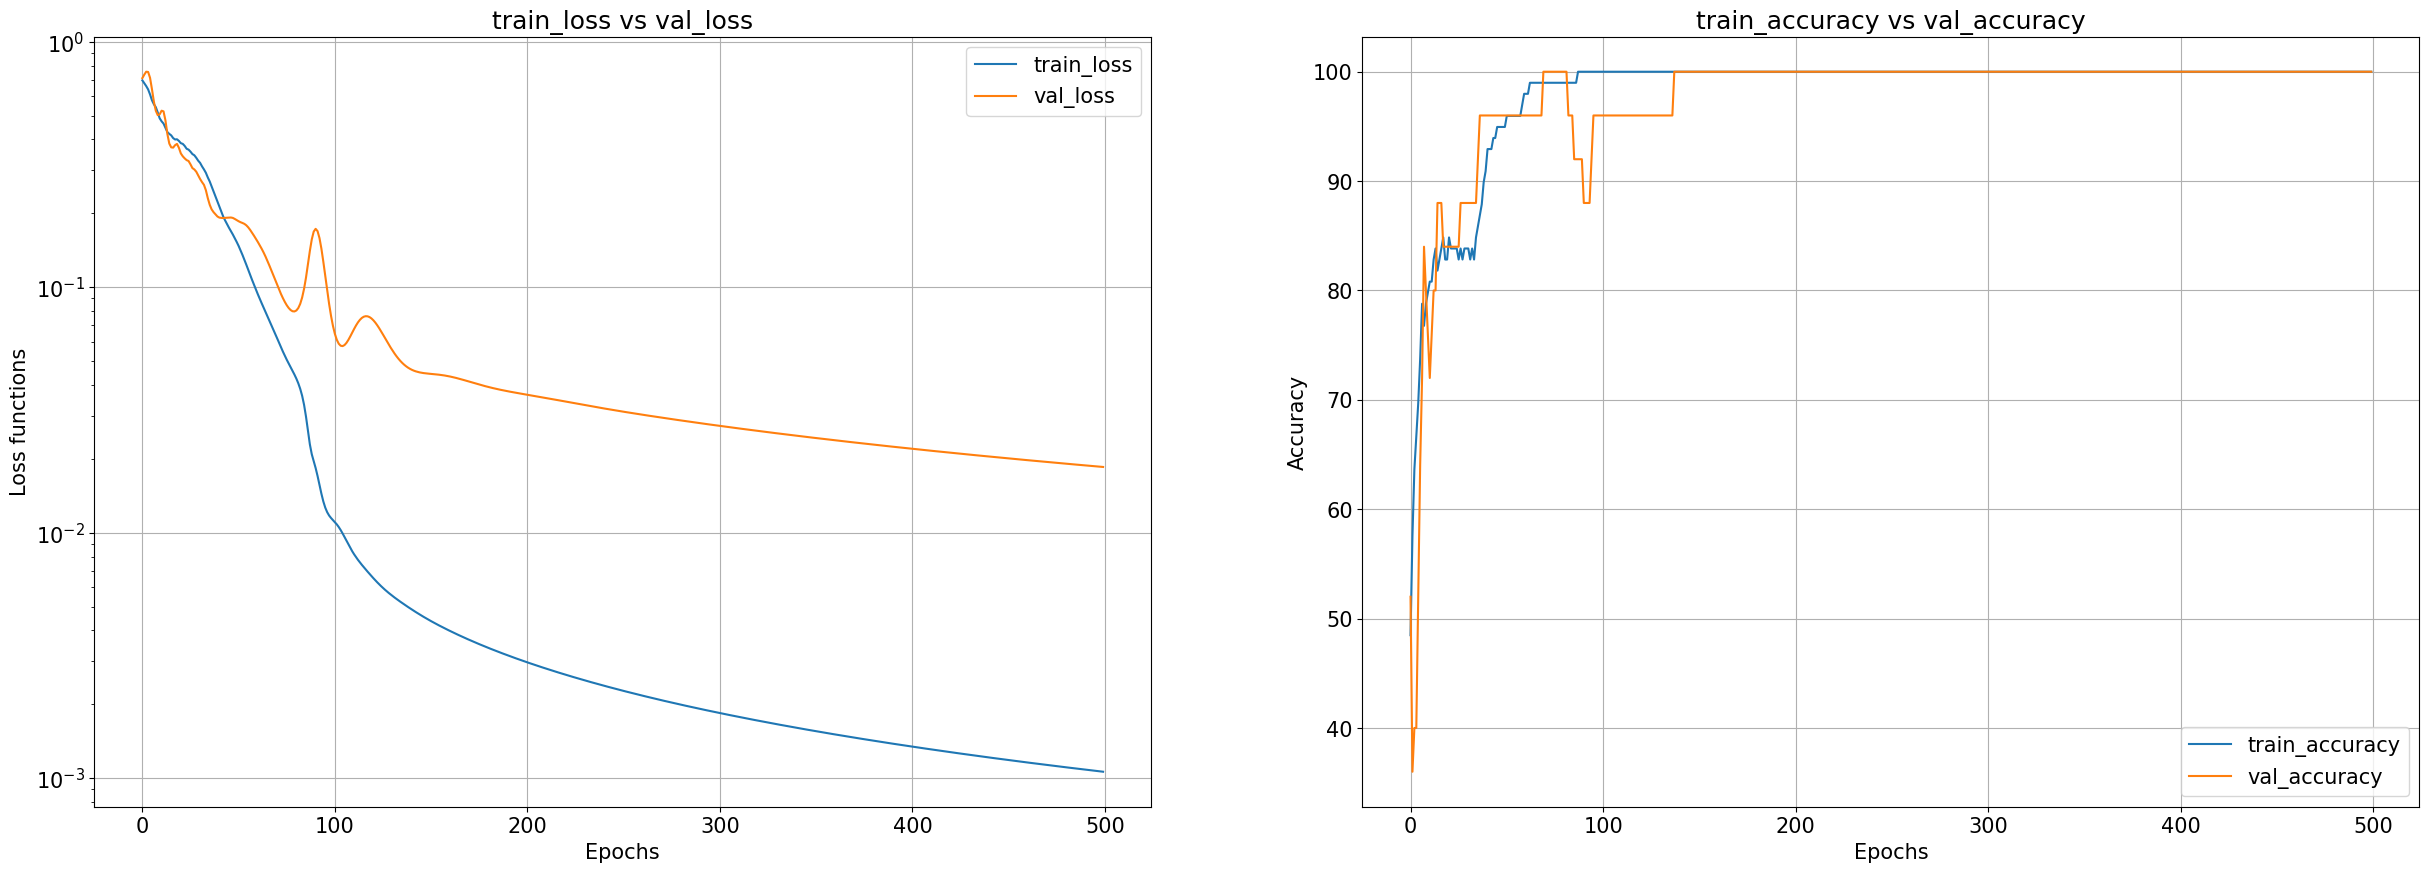

In [13]:
plt.figure(1,figsize=(30,10))
plt.subplot(1,2,1)
plt.plot(history_nonest['train_loss'],label='train_loss')
plt.plot(history_nonest['val_loss'], label='val_loss')
plt.yscale('log')
plt.xlabel('Epochs', size=15)
plt.ylabel('Loss functions', size=15)
plt.title('train_loss vs val_loss', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)
plt.subplot(1,2,2)
plt.plot(history_nonest['train_accuracy'],label='train_accuracy')
plt.plot(history_nonest['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs', size=15)
plt.ylabel('Accuracy', size=15)
plt.title('train_accuracy vs val_accuracy', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)

### Nestorov momentum


Build model


In [14]:
params = orig_params.copy()
input_layer = Input(17)
hidden_layer = Layer(input_layer, params.pop('hidden_dim'), params.pop('hidden_act_func'))
output_layer = Layer(hidden_layer, 1, 'sigm')

model = NeuralNetwork(input_layer, output_layer, loss = 'binary_crossentropy', metrics = [accuracy, MSE])

model.set_initial_weights(init_weights_list)
arr = model.get_initial_weights_list()

Training with Nestorov momentum:


In [15]:
np.random.seed(seed)
params['nest'] = True
history_nest = model.train(X_train_monk, y_train_monk.reshape((1,X_train_monk.shape[1])),
                                    validation_split = 0.2,
                                    early_stopping=None,
                                    reduce_eta=None,
                                    **params
                                    )


Epoch 0: train_loss: 6.964e-01, val_loss: 7.112e-01; train_accuracy: 4.848e+01, val_accuracy: 5.200e+01  train_MSE: 2.517e-01, val_MSE: 2.589e-01  lr : 0.5
Epoch 1: train_loss: 6.785e-01, val_loss: 7.280e-01; train_accuracy: 5.556e+01, val_accuracy: 3.600e+01  train_MSE: 2.428e-01, val_MSE: 2.671e-01  lr : 0.5
Epoch 2: train_loss: 6.590e-01, val_loss: 7.338e-01; train_accuracy: 6.061e+01, val_accuracy: 4.000e+01  train_MSE: 2.332e-01, val_MSE: 2.700e-01  lr : 0.5
Epoch 3: train_loss: 6.348e-01, val_loss: 7.175e-01; train_accuracy: 6.667e+01, val_accuracy: 4.000e+01  train_MSE: 2.214e-01, val_MSE: 2.621e-01  lr : 0.5
Epoch 4: train_loss: 6.045e-01, val_loss: 6.766e-01; train_accuracy: 7.071e+01, val_accuracy: 5.200e+01  train_MSE: 2.068e-01, val_MSE: 2.422e-01  lr : 0.5
Epoch 5: train_loss: 5.736e-01, val_loss: 6.261e-01; train_accuracy: 7.475e+01, val_accuracy: 6.400e+01  train_MSE: 1.921e-01, val_MSE: 2.179e-01  lr : 0.5
Epoch 6: train_loss: 5.456e-01, val_loss: 5.842e-01; train_accur

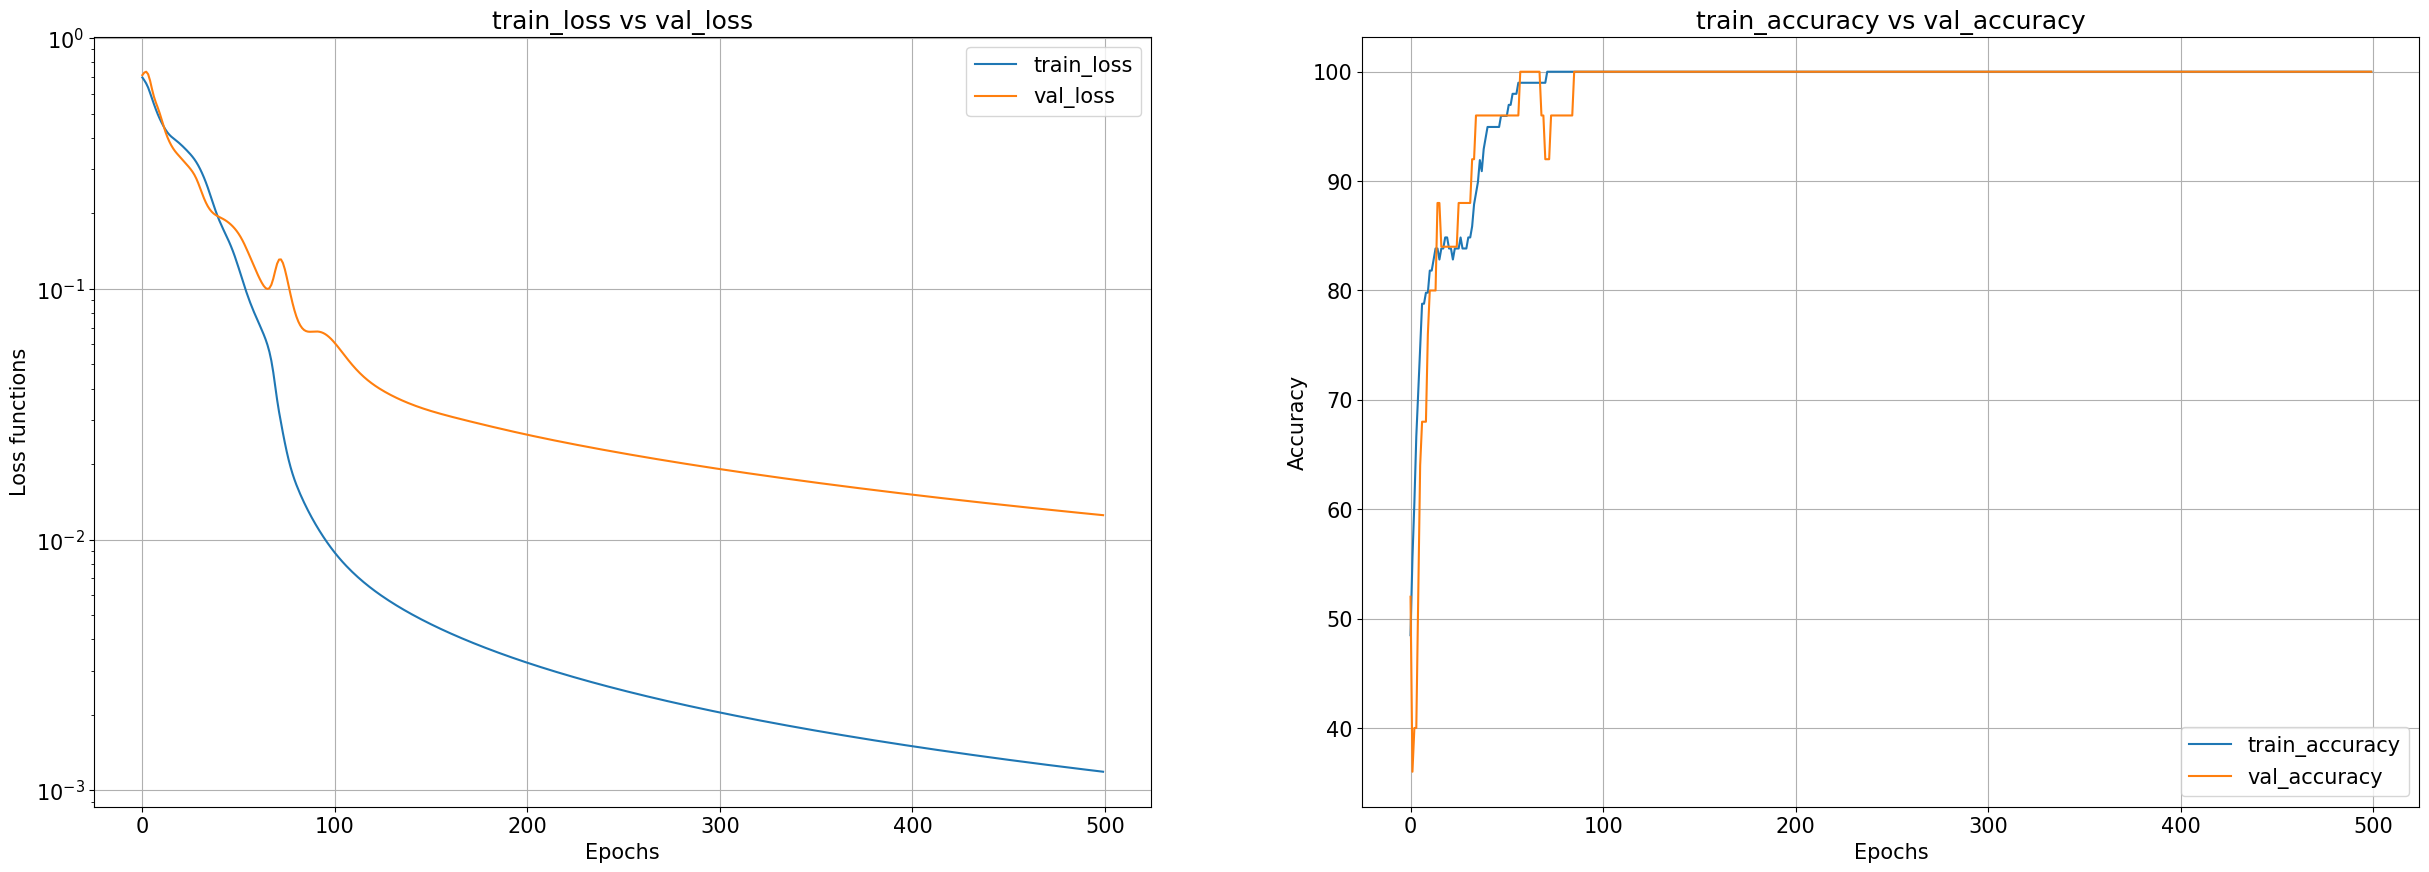

In [16]:
plt.figure(1,figsize=(30,10))
plt.subplot(1,2,1)
plt.plot(history_nest['train_loss'],label='train_loss')
plt.plot(history_nest['val_loss'], label='val_loss')
plt.yscale('log')
plt.xlabel('Epochs', size=15)
plt.ylabel('Loss functions', size=15)
plt.title('train_loss vs val_loss', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)
plt.subplot(1,2,2)
plt.plot(history_nest['train_accuracy'],label='train_accuracy')
plt.plot(history_nest['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs', size=15)
plt.ylabel('Accuracy', size=15)
plt.title('train_accuracy vs val_accuracy', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)


### Comparison

KeyError: 'train_accuracy'

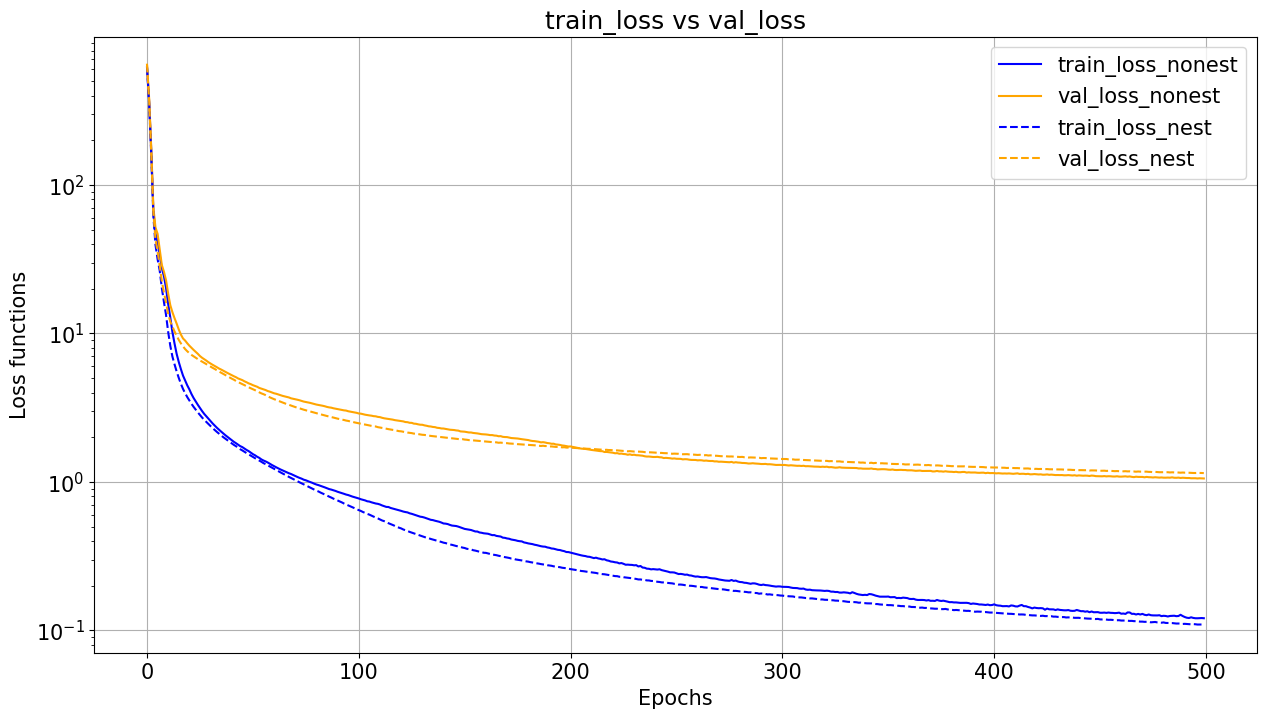

<Figure size 1500x800 with 0 Axes>

In [26]:
plt.figure(1,figsize=(15,8))
#plt.subplot(1,2,1)
plt.plot(history_nonest['train_loss'], '-', label='train_loss_nonest', color='blue')
plt.plot(history_nonest['val_loss'], '-', label='val_loss_nonest', color='orange')
plt.plot(history_nest['train_loss'], '--', label='train_loss_nest', color='blue')
plt.plot(history_nest['val_loss'], '--', label='val_loss_nest', color='orange')
plt.yscale('log')
plt.xlabel('Epochs', size=15)
plt.ylabel('Loss functions', size=15)
plt.title('train_loss vs val_loss', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)
plt.figure(2,figsize=(15,8))
#plt.subplot(1,2,2)
plt.plot(history_nonest['train_accuracy'], '-',label='train_accuracy_nonest', color='blue')
plt.plot(history_nonest['val_accuracy'], '-', label='val_accuracy_nonest', color='orange')
plt.plot(history_nest['train_accuracy'], '--', label='train_accuracy_nest', color='blue')
plt.plot(history_nest['val_accuracy'], '--', label='val_accuracy_nest', color='orange')
plt.xlabel('Epochs', size=15)
plt.ylabel('Accuracy', size=15)
plt.title('train_accuracy vs val_accuracy', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)

## CUP

Define training and model hyperparameters

In [18]:
orig_params = {'hidden_dim': 50,
        'hidden_act_func': 'tanh',
        'hidden_dim2': 50,
        'hidden_act_func2' : 'tanh',
        'eta': 0.001,
        'lam': 0.000,
        'alpha': 0.9,
        'n_batch': 150,
        'use_opt':0,
        'nest': True,
        'l1_reg' : False,
        'epochs' : 500,
        'loss' : 'MSE',
        'output_act_func': 'lin'
        }
seed = np.random.randint(10,1000)

### Normal momentum

Build model

In [19]:
params = orig_params.copy()
input_layer = Input(X_train_cup.shape[0])
hidden_layer = Layer(input_layer, params.pop('hidden_dim'), params.pop('hidden_act_func'))
o = 2
while True:
    if f'hidden_dim{o}' in params.keys():
        hidden_layer = Layer(hidden_layer, params.pop(f'hidden_dim{o}'), params.pop(f'hidden_act_func{o}'))
        o += 1
    else: break
output_layer = Layer(hidden_layer, 3, params.pop('output_act_func'))

model = NeuralNetwork(input_layer, output_layer, params.pop('loss'), metrics=[MEE])

init_weights_list = model.get_initial_weights_list()

Training with normal momentum:

In [20]:
np.random.seed(seed)
params['nest'] = False
history_nonest = model.train(X_train_cup, y_train_cup,
                                    ** params,
                                    validation_split = 0.2,
                                    early_stopping=None,
                                    reduce_eta=None
                                    )

Epoch 0: train_loss: 6.196e+02, val_loss: 6.453e+02; train_MEE: 3.806e+01, val_MEE: 3.880e+01  lr : 0.001
Epoch 1: train_loss: 3.665e+02, val_loss: 3.834e+02; train_MEE: 2.859e+01, val_MEE: 2.914e+01  lr : 0.001
Epoch 2: train_loss: 1.712e+02, val_loss: 1.778e+02; train_MEE: 1.960e+01, val_MEE: 2.027e+01  lr : 0.001
Epoch 3: train_loss: 6.728e+01, val_loss: 7.061e+01; train_MEE: 1.246e+01, val_MEE: 1.278e+01  lr : 0.001
Epoch 4: train_loss: 4.701e+01, val_loss: 5.173e+01; train_MEE: 1.074e+01, val_MEE: 1.142e+01  lr : 0.001
Epoch 5: train_loss: 4.158e+01, val_loss: 4.685e+01; train_MEE: 1.021e+01, val_MEE: 1.090e+01  lr : 0.001
Epoch 6: train_loss: 3.395e+01, val_loss: 3.664e+01; train_MEE: 9.224e+00, val_MEE: 9.508e+00  lr : 0.001
Epoch 7: train_loss: 2.744e+01, val_loss: 2.890e+01; train_MEE: 8.192e+00, val_MEE: 8.251e+00  lr : 0.001
Epoch 8: train_loss: 2.430e+01, val_loss: 2.602e+01; train_MEE: 7.672e+00, val_MEE: 7.775e+00  lr : 0.001
Epoch 9: train_loss: 2.017e+01, val_loss: 2.27

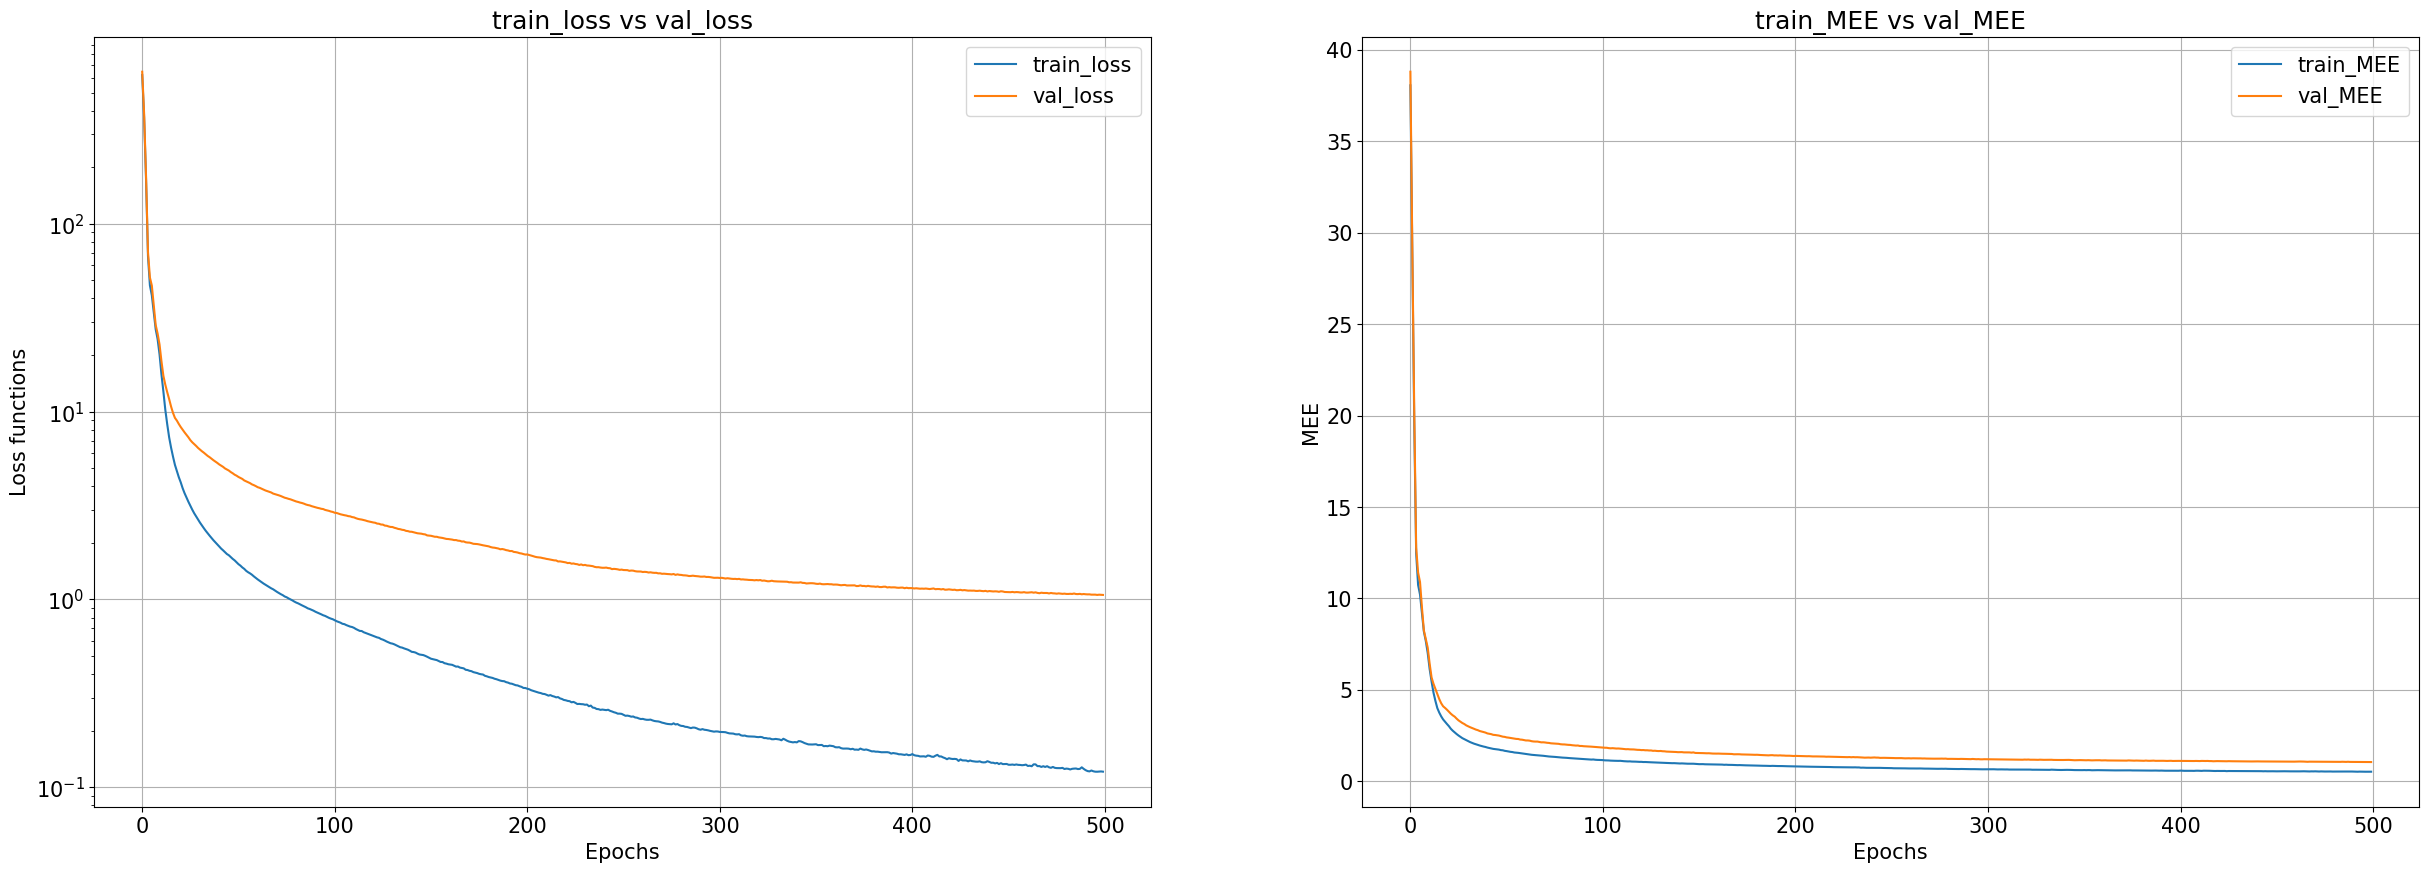

In [21]:
plt.figure(1,figsize=(30,10))
plt.subplot(1,2,1)
plt.plot(history_nonest['train_loss'],label='train_loss')
plt.plot(history_nonest['val_loss'], label='val_loss')
plt.yscale('log')
plt.xlabel('Epochs', size=15)
plt.ylabel('Loss functions', size=15)
plt.title('train_loss vs val_loss', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)
plt.subplot(1,2,2)
plt.plot(history_nonest['train_MEE'],label='train_MEE')
plt.plot(history_nonest['val_MEE'], label='val_MEE')
plt.xlabel('Epochs', size=15)
plt.ylabel('MEE', size=15)
plt.title('train_MEE vs val_MEE', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)

### Nestorov momentum


Build model


In [22]:
params = orig_params.copy()
input_layer = Input(X_train_cup.shape[0])
hidden_layer = Layer(input_layer, params.pop('hidden_dim'), params.pop('hidden_act_func'))
o = 2
while True:
    if f'hidden_dim{o}' in params.keys():
        hidden_layer = Layer(hidden_layer, params.pop(f'hidden_dim{o}'), params.pop(f'hidden_act_func{o}'))
        o += 1
    else: break
output_layer = Layer(hidden_layer, 3, params.pop('output_act_func'))

model = NeuralNetwork(input_layer, output_layer, params.pop('loss'), metrics=[MEE])

model.set_initial_weights(init_weights_list)

Training with L1 regularization:


In [23]:
np.random.seed(seed)
params['nest'] = True
history_nest = model.train(X_train_cup, y_train_cup,
                                    ** params,
                                    validation_split = 0.2,
                                    early_stopping=None,
                                    reduce_eta=None
                                    )

Epoch 0: train_loss: 6.192e+02, val_loss: 6.449e+02; train_MEE: 3.806e+01, val_MEE: 3.880e+01  lr : 0.001
Epoch 1: train_loss: 3.527e+02, val_loss: 3.694e+02; train_MEE: 2.784e+01, val_MEE: 2.845e+01  lr : 0.001
Epoch 2: train_loss: 1.586e+02, val_loss: 1.632e+02; train_MEE: 1.848e+01, val_MEE: 1.894e+01  lr : 0.001
Epoch 3: train_loss: 6.146e+01, val_loss: 6.489e+01; train_MEE: 1.169e+01, val_MEE: 1.202e+01  lr : 0.001
Epoch 4: train_loss: 3.948e+01, val_loss: 4.317e+01; train_MEE: 9.764e+00, val_MEE: 1.024e+01  lr : 0.001
Epoch 5: train_loss: 3.164e+01, val_loss: 3.549e+01; train_MEE: 8.808e+00, val_MEE: 9.332e+00  lr : 0.001
Epoch 6: train_loss: 2.647e+01, val_loss: 2.864e+01; train_MEE: 8.070e+00, val_MEE: 8.334e+00  lr : 0.001
Epoch 7: train_loss: 2.021e+01, val_loss: 2.249e+01; train_MEE: 7.001e+00, val_MEE: 7.199e+00  lr : 0.001
Epoch 8: train_loss: 1.625e+01, val_loss: 1.883e+01; train_MEE: 6.177e+00, val_MEE: 6.431e+00  lr : 0.001
Epoch 9: train_loss: 1.328e+01, val_loss: 1.61

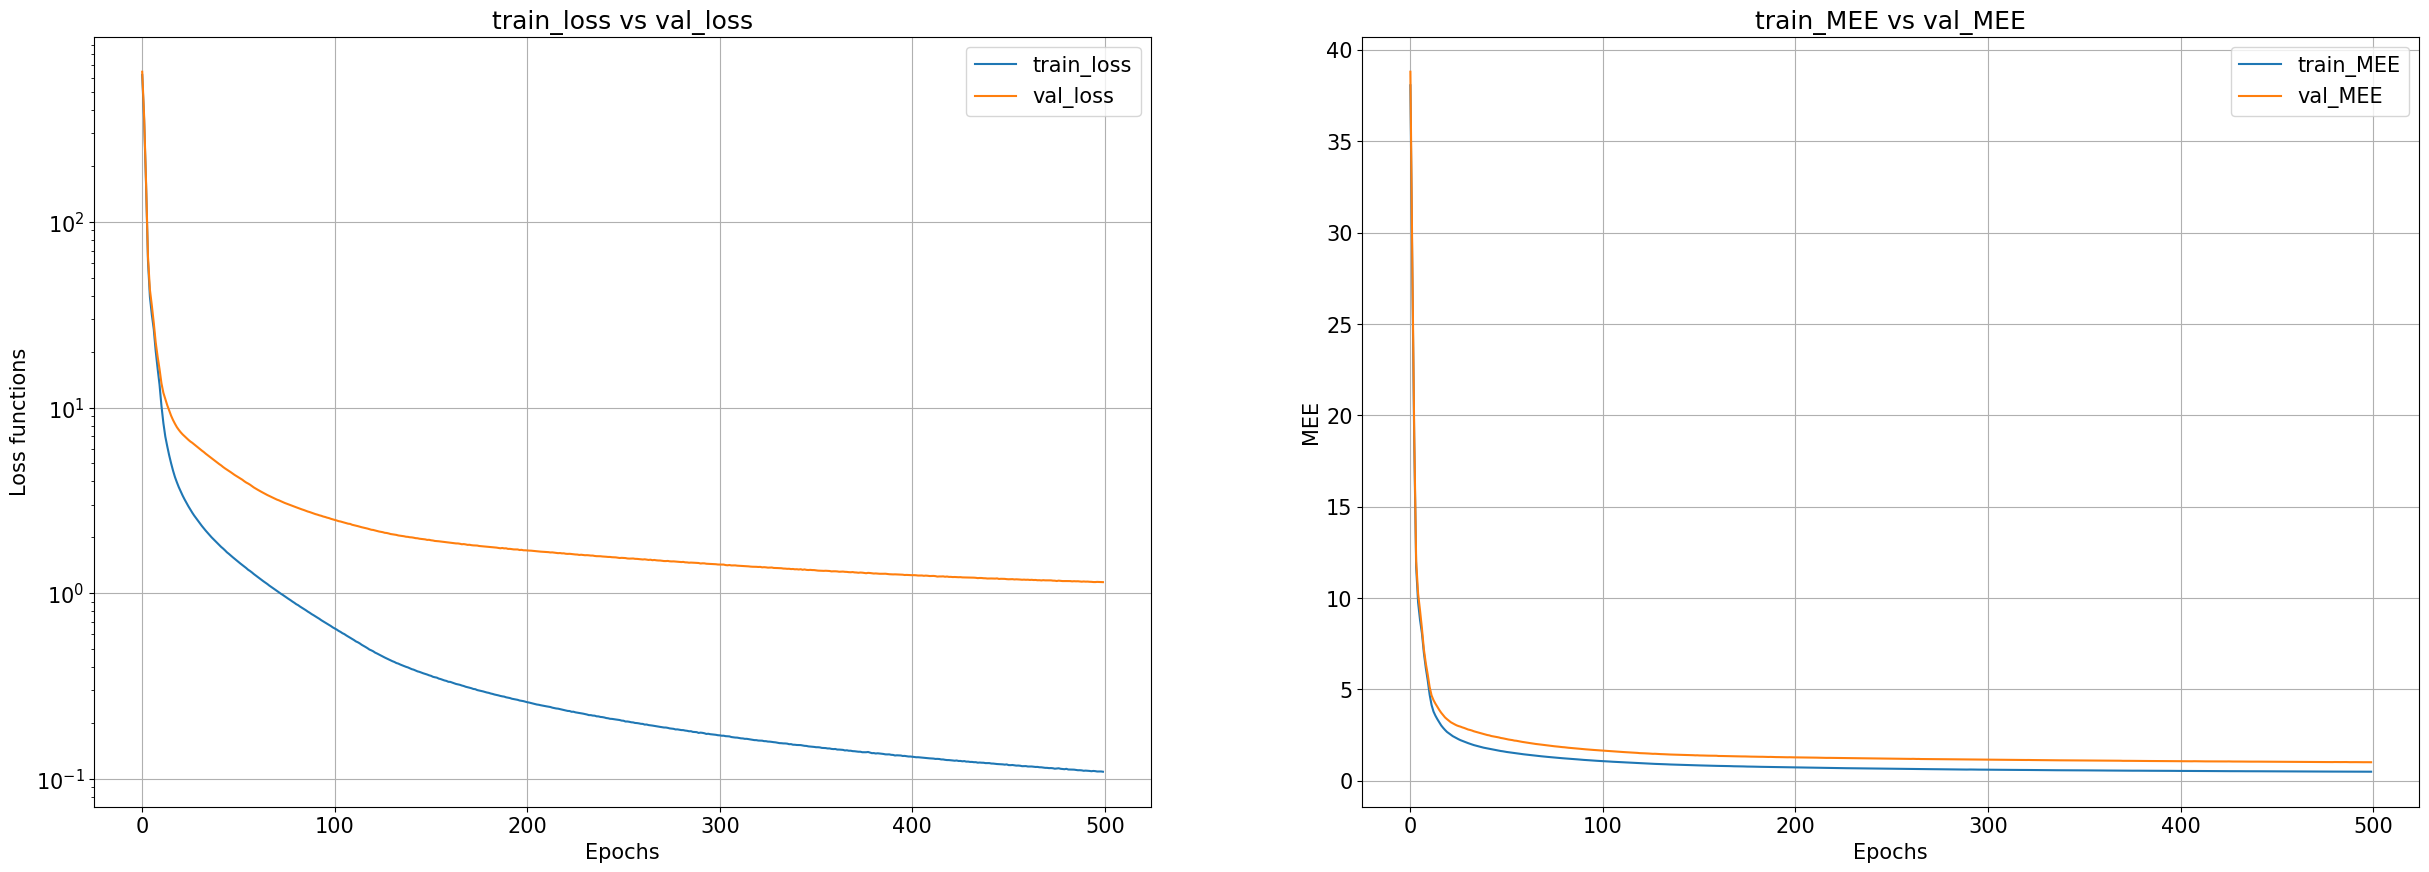

In [24]:
plt.figure(1,figsize=(30,10))
plt.subplot(1,2,1)
plt.plot(history_nest['train_loss'],label='train_loss')
plt.plot(history_nest['val_loss'], label='val_loss')
plt.yscale('log')
plt.xlabel('Epochs', size=15)
plt.ylabel('Loss functions', size=15)
plt.title('train_loss vs val_loss', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)
plt.subplot(1,2,2)
plt.plot(history_nest['train_MEE'],label='train_MEE')
plt.plot(history_nest['val_MEE'], label='val_MEE')
plt.xlabel('Epochs', size=15)
plt.ylabel('MEE', size=15)
plt.title('train_MEE vs val_MEE', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)


### Comparison

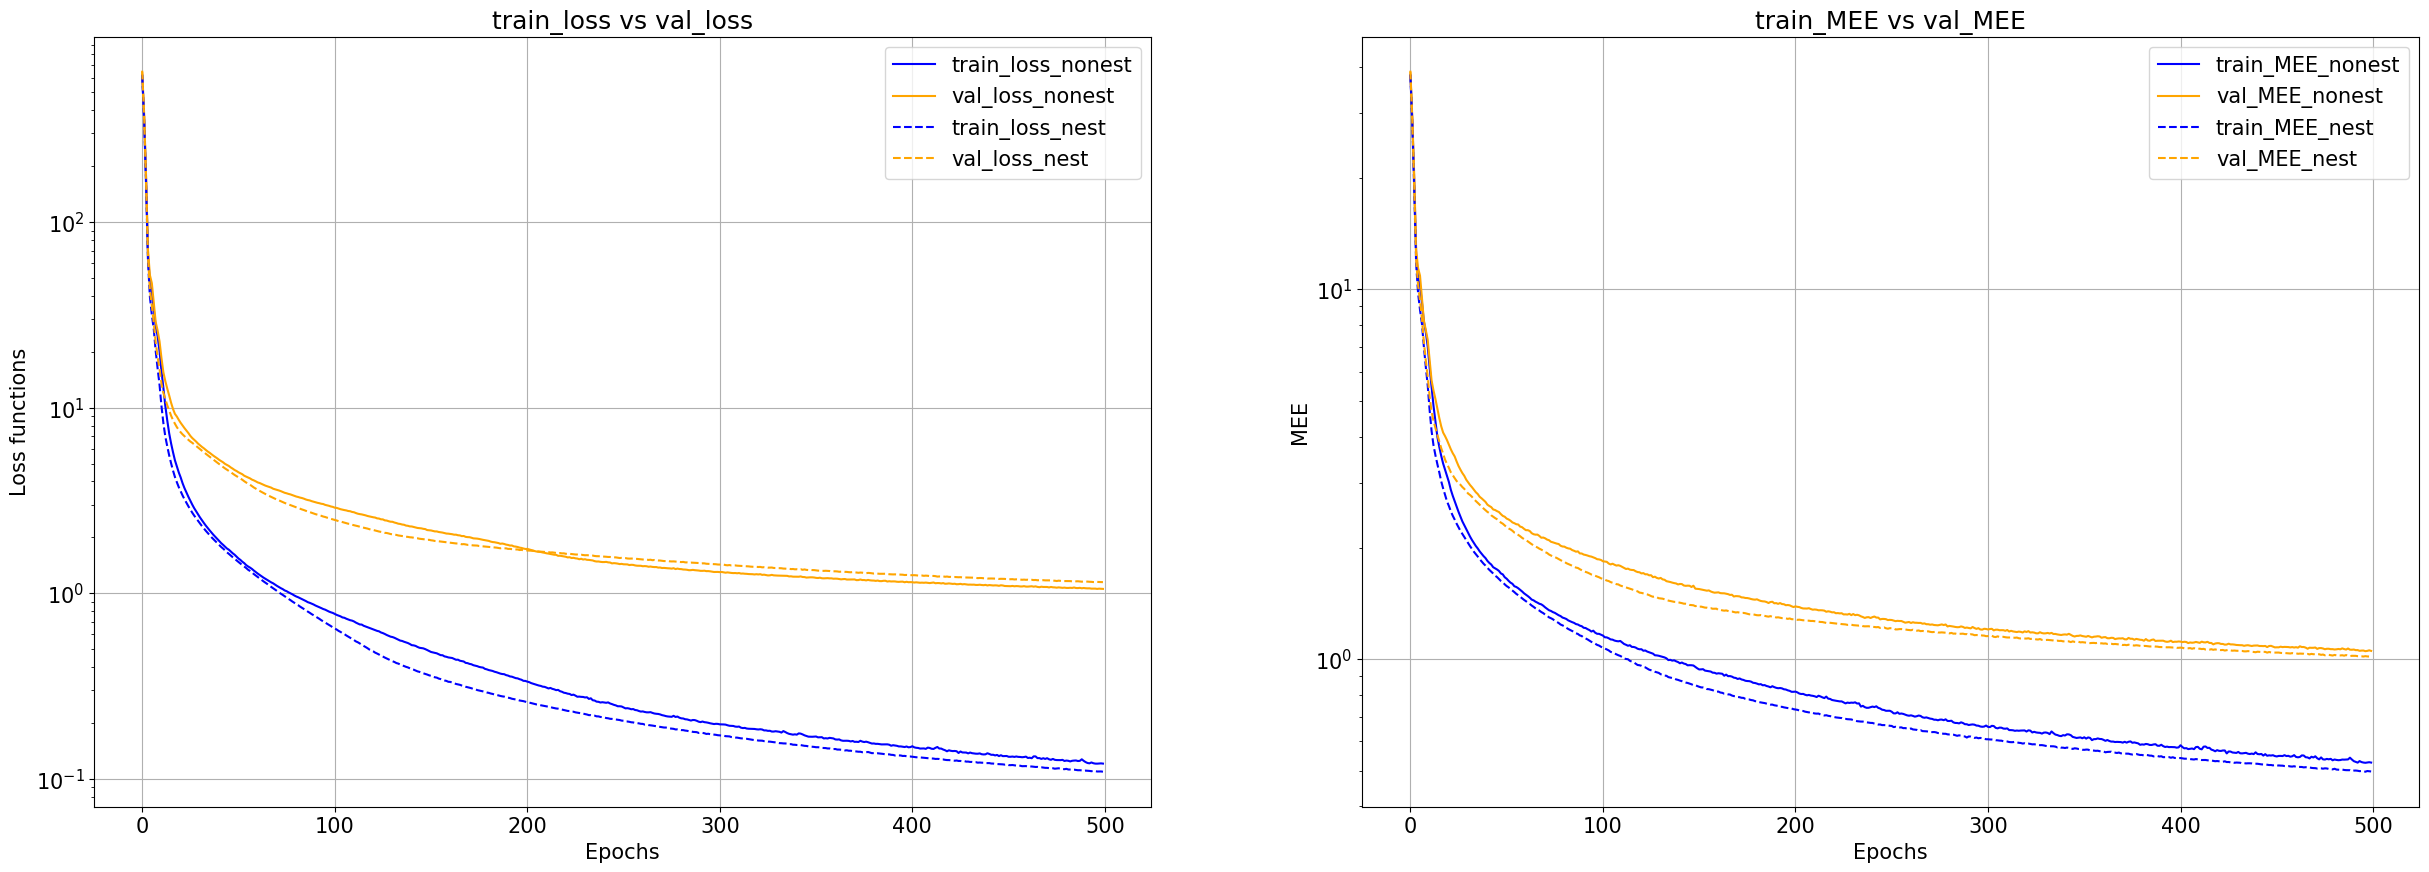

In [25]:
plt.figure(1,figsize=(15,8))
#plt.subplot(1,2,1)
plt.plot(history_nonest['train_loss'], '-', label='train_loss_nonest', color='blue')
plt.plot(history_nonest['val_loss'], '-', label='val_loss_nonest', color='orange')
plt.plot(history_nest['train_loss'], '--', label='train_loss_nest', color='blue')
plt.plot(history_nest['val_loss'], '--', label='val_loss_nest', color='orange')
plt.yscale('log')
plt.xlabel('Epochs', size=15)
plt.ylabel('Loss functions', size=15)
plt.title('train_loss vs val_loss', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)
plt.figure(2,figsize=(15,8))
#plt.subplot(1,2,2)
plt.plot(history_nonest['train_MEE'], '-',label='train_MEE_nonest', color='blue')
plt.plot(history_nonest['val_MEE'], '-', label='val_MEE_nonest', color='orange')
plt.plot(history_nest['train_MEE'], '--', label='train_MEE_nest', color='blue')
plt.plot(history_nest['val_MEE'], '--', label='val_MEE_nest', color='orange')
plt.yscale('log')
plt.xlabel('Epochs', size=15)
plt.ylabel('MEE', size=15)
plt.title('train_MEE vs val_MEE', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)